Problem Set 4 for Macro, Huan Deng

In [1]:
# Initial notebook set up

%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

# Buffer Stock Saving and Balance Sheets

a)

1)

At period $-1$, even the borrower become unemployed next period, the PDV of the money a lender can seize from the borrower is $H_{-1}=\frac{N_{0}}{r}$. So even the lender is infinitely risk-averse, he or she can always avoid any loss by lending up to this amount.

2)

$C_{0}^{u}=(1-(\beta R)^{1/\rho}/R)(A_{-1}R+H_{-1}R)$. The return impatience condition guarantees that when $A_{-1}>-H_{-1}$, the consumption of unemployed consumer will be strictly positive throughout his or her unemployed life. That is to say, the consumer must not be so patience that, given the interest rate, a boost to resources fails to boost consumption. This condition also guarantees that the PDV of the unemployed consumer's consumption is not infinity.



3)

From $C_{0}^{u}=(1-(\beta R)^{1/\rho}/R)(A_{-1}R+H_{-1}R)$, we know that with the unemployment insurance program, the lifelong resources for an unemployed consumer have an extra term $H_{-1}R=\frac{N_{0}R}{r}$, which is the PDV of unemployment payment. So it is equivalent to a lump sum payment of $H_{-1}R=\frac{N_{0}R}{r}$ upon entering his or her first period of unemployment. Since there is no uncertainty in the future for an already unemployed consumer, only the PDV of the payment matters, and the fluctuation of the payment doesn't matter as long as it has the same PDV.

4)

\begin{align}
h_{-1} &=\frac{H_{-1}}{w_{-1}l_{-1}} \\
       &=\frac{\eta w_{0}l_{0}}{rw_{-1}l_{-1}} \\
       &=\frac{\eta \Gamma}{r}
\end{align}


5)

Divide $C_{t}^{u}=(1-(\beta R)^{1/\rho}/R)(A_{t-1}R+\frac{N_{t}R}{r})$ by labor income, we get the lower-case version:

\begin{equation}
c_{t}^{u} = \frac{R}{\Gamma}(1-(\beta R)^{1/\rho}/R)(m_{t-1}^{e}-c_{t-1}^{e}+\frac{\eta}{r}) 
\end{equation}      

Since we have $c_{t}^{e}=\Pi c_{t+1}^{u}=\Pi \frac{R}{\Gamma}(1-(\beta R)^{1/\rho}/R)(m_{t}^{e}-c_{t}^{e}+\frac{\eta}{r})$, let $k=(1-(\beta R)^{1/\rho}/R)$, so the new consumption locus is:
\begin{equation}
c^{e}=\frac{kR\Pi}{\Gamma+kR\Pi}(m^{e}+\frac{\eta\Gamma}{r})
\end{equation}

So the effct of the unemployment insurance is to shift the consumption function to the left by $\frac{\eta\Gamma}{r}$. If the leftward shift is large enough, the target ratio of bank balance can be negative.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK # Prevents import error from Demos repo
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.3f}".format(number)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

In [3]:
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)
MyTBStype.solve()


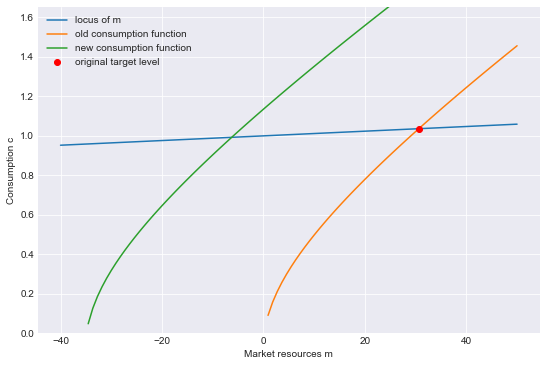

In [4]:
cMin=0
cMax=1.5
mMin=-40
mMax=50
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)
c_range=np.linspace(cMin,cMax,num=100,endpoint=True)
k=1-(MyTBStype.Rfree*MyTBStype.DiscFac)**(1/MyTBStype.CRRA)/MyTBStype.Rfree 
gro_impatience=((MyTBStype.Rfree*MyTBStype.DiscFac)**(1/MyTBStype.CRRA))*(1-MyTBStype.UnempPrb)/MyTBStype.PermGroFac
PIE=(1+(gro_impatience**(-MyTBStype.CRRA)-1)/MyTBStype.UnempPrb)**(1/MyTBStype.CRRA)
plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,cMax*1.1)     # set the range for the vertical axis with a 10 percent margin at top
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# Plot the locus of m
plt.plot(m_range, MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb)) + m_range*(1.0-MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb))),
         label='locus of m')

# Plot the locus of c
#plt.plot(m_range, (MyTBStype.Rfree*PIE*k*(m_range)/MyTBStype.PermGroFacCmp)/(1+MyTBStype.Rfree*PIE*k/MyTBStype.PermGroFacCmp),
#        label='locus of c')

# Plot the new locus of c
#plt.plot(m_range, (MyTBStype.Rfree*PIE*k*(m_range+35)/MyTBStype.PermGroFacCmp)/(1+MyTBStype.Rfree*PIE*k/MyTBStype.PermGroFacCmp),
#        label='new locus of c')

# Plot consumption for employed people

plt.plot(m_range, MyTBStype.solution[0].cFunc(m_range),label='old consumption function')

plt.plot(m_range, MyTBStype.solution[0].cFunc(m_range+35),label='new consumption function')

#plt.plot(m_range, m_range, 'k-', label='45 Degree line')

mTarg = MyTBStype.mTarg
cTarg = MyTBStype.cTarg

plt.plot(mTarg , cTarg, 'ro', label='original target level')


plt.legend()      
plt.show()


6)

Natural borrowing constraint is the amount that a consumer can borrow with future consumption equaling to zero forever. That is to say, the consumer has to use all the future resources to repay this amount, thus driving his or her future consumption to zero. With unemployment benefits, the lifelong resources of a consumer increases, so his or her natural borrowing constraint is relaxed.

b)
Expreriemt 1: Suddenly people become more optimistic about labor market, and the optimism lasts for 6 years.

In [18]:
TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)
MyTBStype.solve()

#Now lower the probability of unemployment to 0.004
TBS_dictionary1 =  {'UnempPrb' : .004,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype1 = TractableConsumerType(**TBS_dictionary1)
MyTBStype1.solve()

#Now increase the growth rate
TBS_dictionary2 =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0045,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype2 = TractableConsumerType(**TBS_dictionary2)
MyTBStype2.solve()



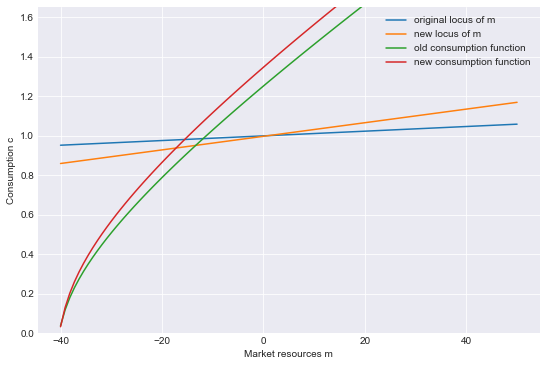

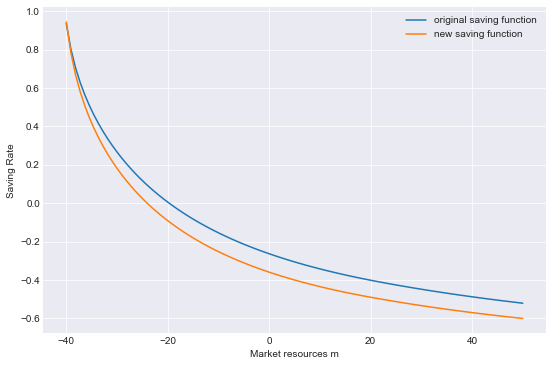

In [19]:

cMin=0
cMax=1.5
mMin=-40
mMax=50
eta=0.4
h=MyTBStype.PermGroFac*eta/((MyTBStype.Rfree-1)*(1-MyTBStype.UnempPrb))
h1=MyTBStype1.PermGroFac*eta/((MyTBStype.Rfree-1)*(1-MyTBStype1.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)
c_range=np.linspace(cMin,cMax,num=100,endpoint=True)
k=1-(MyTBStype.Rfree*MyTBStype.DiscFac)**(1/MyTBStype.CRRA)/MyTBStype.Rfree # the same for both cases
gro_impatience=((MyTBStype.Rfree*MyTBStype.DiscFac)**(1/MyTBStype.CRRA))*(1-MyTBStype.UnempPrb)/MyTBStype.PermGroFac
gro_impatience1=((MyTBStype1.Rfree*MyTBStype1.DiscFac)**(1/MyTBStype1.CRRA))*(1-MyTBStype1.UnempPrb)/MyTBStype1.PermGroFac
PIE=(1+(gro_impatience**(-MyTBStype.CRRA)-1)/MyTBStype.UnempPrb)**(1/MyTBStype.CRRA)
PIE1=(1+(gro_impatience1**(-MyTBStype1.CRRA)-1)/MyTBStype1.UnempPrb)**(1/MyTBStype1.CRRA)

plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,cMax*1.1)     # set the range for the vertical axis with a 10 percent margin at top
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# Plot the orginal locus of m
plt.plot(m_range, MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb)) + m_range*(1.0-MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb))),
         label='original locus of m')

# Plot the new locus of m
plt.plot(m_range, MyTBStype1.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype1.UnempPrb)) + m_range*(1.0-MyTBStype1.PermGroFac/(MyTBStype1.Rfree*(1-MyTBStype1.UnempPrb))),
         label='new locus of m')

         
         
# Plot the orginal locus of c
#plt.plot(m_range, (MyTBStype.Rfree*PIE*k*(m_range)*(1-MyTBStype.UnempPrb)/MyTBStype.PermGroFac)/(1+MyTBStype.Rfree*PIE*k/MyTBStype.PermGroFacCmp),
      #label='original locus of c')

# Plot the new locus of c
#plt.plot(m_range, (MyTBStype1.Rfree*PIE1*k*(m_range)*(1-MyTBStype1.UnempPrb)/MyTBStype1.PermGroFac)/(1+MyTBStype1.Rfree*PIE1*k/MyTBStype1.PermGroFacCmp),
      #label='new locus of c')

# Plot consumption for employed people

plt.plot(m_range, MyTBStype.solution[0].cFunc(m_range+h),label='old consumption function')

plt.plot(m_range, MyTBStype1.solution[0].cFunc(m_range+h1),label='new consumption function')

plt.legend()      
plt.show()

# Plot the saving rate for the original and the new 
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Saving Rate')      # y axis label
c_e = MyTBStype.solution[0].cFunc(m_range+h)
c_e1= MyTBStype1.solution[0].cFunc(m_range+h1)
s_buffer=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e)/((MyTBStype.Rfree-1)*m_range+1) 
s_buffer1=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e1)/((MyTBStype.Rfree-1)*m_range+1) 
plt.plot(m_range, s_buffer, label='original saving function')
plt.plot(m_range, s_buffer1,label='new saving function')
plt.legend()
plt.show()

From the above graph, the moment people change their expectation about labor market, consumption will immediately jump to the new consumption function (the red line), and move on the new path towards the new target level. After six years, people change their expectation back to the original value, consumption will jump back to the original consumption function (the green line), and move towards the original target. In this process, saving rate will first jump to a lower level, then slowly increases during the six years, at the sixth year, the saving rate will suddenly jump to a higher level, and then slowly goes back to its original level. The time series of saving rate looks like this:

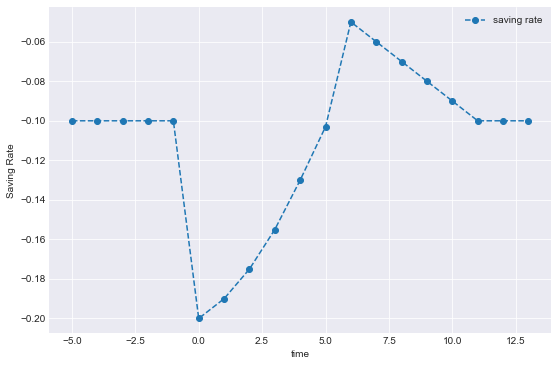

In [20]:
T_range=list(range(-5,14))
S1=[-0.1,-0.1,-0.1,-0.1,-0.1, -0.2, -0.19, -0.175, -0.155, -0.13, -0.103,-0.05,-0.06,-0.07, -0.08,-0.09,-0.1,-0.1,-0.1]
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('time') # x axis label
plt.ylabel('Saving Rate')      # y axis label
plt.plot(T_range, S1, marker='o', linestyle= '--', label='saving rate')

plt.legend()
plt.show()


Experiment 2: People become more optimistic about future growth

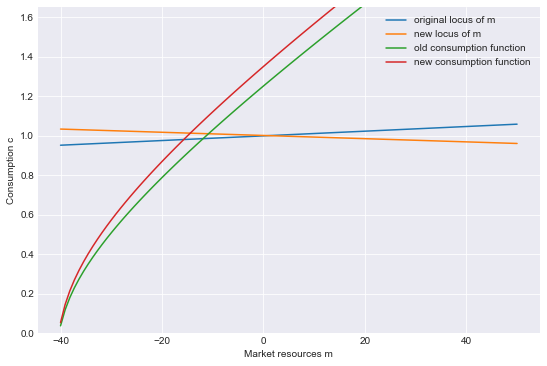

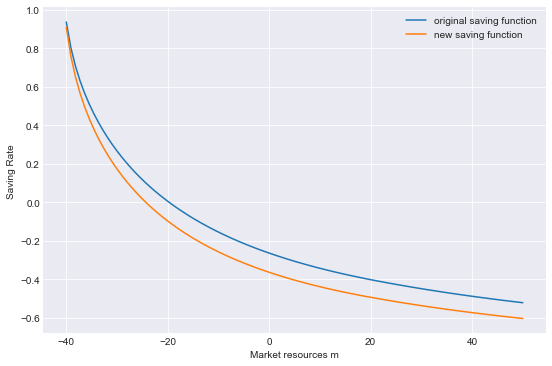

In [21]:
eta=0.4
h2=MyTBStype2.PermGroFac*eta/((MyTBStype.Rfree-1)*(1-MyTBStype.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)
c_range=np.linspace(cMin,cMax,num=100,endpoint=True)
gro_impatience2=((MyTBStype.Rfree*MyTBStype.DiscFac)**(1/MyTBStype.CRRA))*(1-MyTBStype.UnempPrb)/MyTBStype2.PermGroFac
PIE2=(1+(gro_impatience2**(-MyTBStype.CRRA)-1)/MyTBStype.UnempPrb)**(1/MyTBStype.CRRA)

plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,cMax*1.1)     # set the range for the vertical axis with a 10 percent margin at top
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# Plot the orginal locus of m
plt.plot(m_range, MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb)) + m_range*(1.0-MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb))),
         label='original locus of m')

# Plot the new locus of m
plt.plot(m_range, MyTBStype2.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb)) + m_range*(1.0-MyTBStype2.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb))),
         label='new locus of m')

         
         
# Plot the orginal locus of c
#plt.plot(m_range, (MyTBStype.Rfree*PIE*k*(m_range)*(1-MyTBStype.UnempPrb)/MyTBStype.PermGroFac)/(1+MyTBStype.Rfree*PIE*k/MyTBStype.PermGroFacCmp),
      #label='original locus of c')

# Plot the new locus of c
#plt.plot(m_range, (MyTBStype1.Rfree*PIE1*k*(m_range)*(1-MyTBStype1.UnempPrb)/MyTBStype1.PermGroFac)/(1+MyTBStype1.Rfree*PIE1*k/MyTBStype1.PermGroFacCmp),
      #label='new locus of c')

# Plot consumption for employed people

plt.plot(m_range, MyTBStype.solution[0].cFunc(m_range+h),label='old consumption function')

plt.plot(m_range, MyTBStype1.solution[0].cFunc(m_range+h2),label='new consumption function')

plt.legend()      
plt.show()

# Plot the saving rate for the original and the new
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Saving Rate')      # y axis label
c_e = MyTBStype.solution[0].cFunc(m_range+h)
c_e2= MyTBStype1.solution[0].cFunc(m_range+h2)
s_buffer=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e)/((MyTBStype.Rfree-1)*m_range+1) 
s_buffer2=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e2)/((MyTBStype.Rfree-1)*m_range+1) 
plt.plot(m_range, s_buffer, label='original saving function')
plt.plot(m_range, s_buffer2,label='new saving function')
plt.legend()
plt.show()

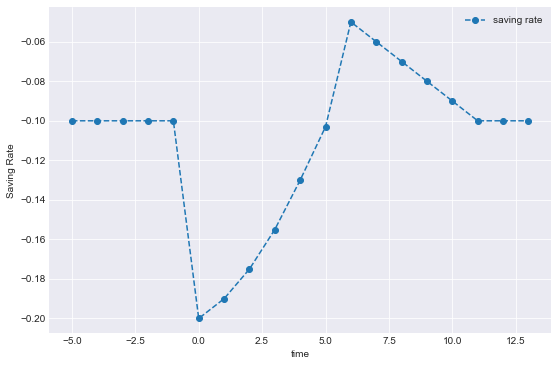

In [14]:
# The path of the saving rate looks similar to that in experiement 1
T_range=list(range(-5,14))
S1=[-0.1,-0.1,-0.1,-0.1,-0.1, -0.2, -0.19, -0.175, -0.155, -0.13, -0.103,-0.05,-0.06,-0.07, -0.08,-0.09,-0.1,-0.1,-0.1]
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('time') # x axis label
plt.ylabel('Saving Rate')      # y axis label
plt.plot(T_range, S1, marker='o', linestyle= '--', label='saving rate')

plt.legend()
plt.show()



Experiment 3: Unemployment insurance increases

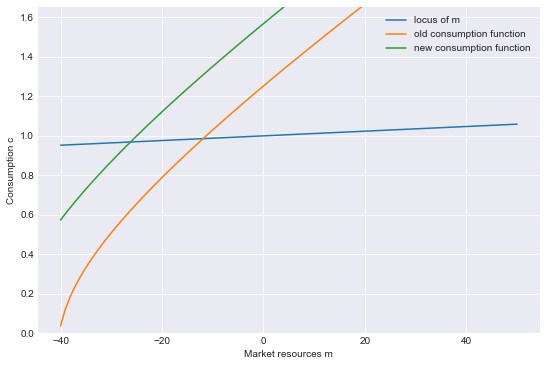

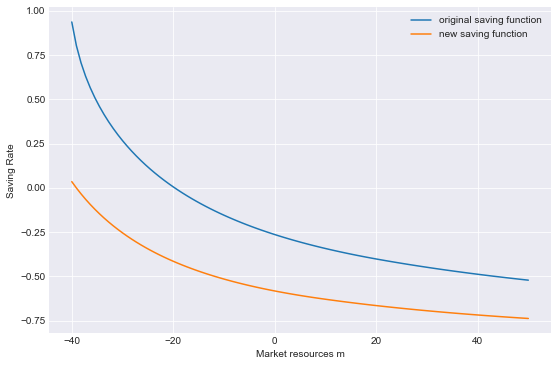

In [22]:
# Now increase eta

eta_new=0.5
h3=MyTBStype.PermGroFac*eta_new/((MyTBStype.Rfree-1)*(1-MyTBStype.UnempPrb))
m_range=np.linspace(mMin,mMax,num=100,endpoint=True)
c_range=np.linspace(cMin,cMax,num=100,endpoint=True)


plt.figure(figsize=(9,6)) # set the figure size
plt.ylim(0.,cMax*1.1)     # set the range for the vertical axis with a 10 percent margin at top
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Consumption c')      # y axis label

# Plot the locus of m
plt.plot(m_range, MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb)) + m_range*(1.0-MyTBStype.PermGroFac/(MyTBStype.Rfree*(1-MyTBStype.UnempPrb))),
         label='locus of m')

# Plot the orginal locus of c
#plt.plot(m_range, (MyTBStype.Rfree*PIE*k*(m_range)*(1-MyTBStype.UnempPrb)/MyTBStype.PermGroFac)/(1+MyTBStype.Rfree*PIE*k/MyTBStype.PermGroFacCmp),
      #label='original locus of c')

# Plot the new locus of c
#plt.plot(m_range, (MyTBStype1.Rfree*PIE1*k*(m_range)*(1-MyTBStype1.UnempPrb)/MyTBStype1.PermGroFac)/(1+MyTBStype1.Rfree*PIE1*k/MyTBStype1.PermGroFacCmp),
      #label='new locus of c')

# Plot consumption for employed people

plt.plot(m_range, MyTBStype.solution[0].cFunc(m_range+h),label='old consumption function')

plt.plot(m_range, MyTBStype1.solution[0].cFunc(m_range+h3),label='new consumption function')

plt.legend()      
plt.show()

# Plot the saving rate for the original and the new
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('Market resources m') # x axis label
plt.ylabel('Saving Rate')      # y axis label
c_e = MyTBStype.solution[0].cFunc(m_range+h)
c_e3= MyTBStype1.solution[0].cFunc(m_range+h3)
s_buffer=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e)/((MyTBStype.Rfree-1)*m_range+1) 
s_buffer3=((MyTBStype.Rfree-1)*m_range+1-MyTBStype.Rfree*c_e3)/((MyTBStype.Rfree-1)*m_range+1) 
plt.plot(m_range, s_buffer, label='original saving function')
plt.plot(m_range, s_buffer3,label='new saving function')
plt.legend()
plt.show()


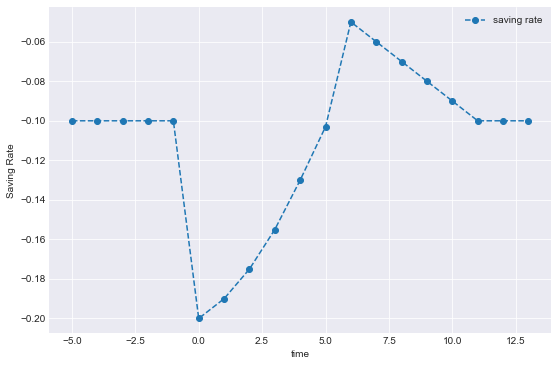

In [23]:
# The path of the saving rate looks similar to that in experiement 1 and 2
T_range=list(range(-5,14))
S1=[-0.1,-0.1,-0.1,-0.1,-0.1, -0.2, -0.19, -0.175, -0.155, -0.13, -0.103,-0.05,-0.06,-0.07, -0.08,-0.09,-0.1,-0.1,-0.1]
plt.figure(figsize=(9,6)) # set the figure size
plt.xlabel('time') # x axis label
plt.ylabel('Saving Rate')      # y axis label
plt.plot(T_range, S1, marker='o', linestyle= '--', label='saving rate')

plt.legend()
plt.show()

# Asset pricing in a Financial Crisis

a)

The general formula for asset pricing is:

\begin{equation}
p_{t}=E_{t}(m_{t+1}x_{t+1}),
\end{equation}

where $x_{t+1}$ is the payoff at period $t+1$: $p_{t+1}+d_{t+1}$.
By repeated substitution, we have the following formula:

\begin{equation}
p_{t}=E_{t}(m_{t,t+1}d_{t+1}+m_{t,t+2}d_{t+2}+m_{t,t+3}d_{t+3}...),
\end{equation}

In C-CAMP model, $m_{t+1}=\beta \frac{u^{'}(c_{t+1})}{u^{'}(c_{t})}$. In equilibrium, consumption equals dividend, since we assume that the subprime market is small relative to the size of the other market, we can write $c_{t}=D^{o}_{t}$ in equilibrium. 

Now we can answer the first question. When there is a one-time permanent drop in the dividend of subprime asset, since the subprime market is small, the pricing kernal $m_{t,t+n}$ only depends on the dividend from the other asset, so it won't change. According to the above formula, $P_{s}$ will also drop to half of its original level, but $\frac{P_{s}}{D_{s}}$ stays the same. Both the price and price-dividend ratio of the other asset won't change.







b)

Using the formula from C-CAMP model, we have the following equation characterizing excess return and its covariance with consumption growth:
\begin{equation}
E_{t}(R_{t+1}^{s})-R^{f} \approx \rho cov_{t}(\triangle ln c_{t+1}, R_{t+1}^{s})
\end{equation}

One important implication from the above equation is that idiosyncratic risk is not priced, only covariance with consumption will affect asset pricing. For consumers, the risk from an asset is not the asset's volatility itself, but how the payoff from the asset moves with their conusmption. If a consumer has highly volatile labor income, an asset that pays more in bad times and pays less in good times will surely be more valuable to him or her than an asset that pays the same amount in all times. The former asset has higher variance, yet a higher price.

So for this question, the price and the price-dividend ratio of the othet asset will nearly stay the same, but how the price of the subprime asset changes will depend on whether higher variance is transmitted into a higher covariance with consumption growth. If the covariance with consumption also rises, then the expected return of the subprime asset will rise, and its price and price-dividend ratio will fall; if not, its price and price-dividend ratio will stay the same.

c)

According to $E_{t}(R_{t+1})-R^{f} \approx \rho cov_{t}(\triangle ln c_{t+1}, R_{t+1})$, an increase in risk-aversion means higher expected return on both assets, so the price and price-dividend ratio of both assets will fall.
